# Tensorflow in Practice: Course 1 - Week 3

* In this Week we will learn how to train deep convolutional neural networks

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time

### Arguement breakdown for Conv2D layer

* The first arguement is the number of fitlers we are telling keras to generate = 64
* Second comes the shape of the filter i.e. (3, 3)
* Third is selfexplanatory
* Fourth is the shape of the input image. Notice that we have provided a third dimension because if there were 3 channels we would've provided 28, 28, 3


1. filters
2. kernel_size (f, f)
3. strides
4. padding: "valid" or "same"
5. data_format (shape)
6. **kwargs

### Arguement breakdown for Maxpooling2D layer

1. pool_size: int or tuple of 2 ints. window size over which to take the maximum. In the following code we have provided an int i.e 2
2. strides: Integer, tuple of 2 ints or None. If None, defaults to pool_size. In the following code we have provided 2.
3. padding: "valid" or "same" - case insensitive: defaults to valid
    - "same" padding is the padding such that if s=1, the output shape is the same as input shape
    - "valid" means no padding.

### A few formulas for calculating the dimensions of the output from conv2d layer

* If nH, nW are the height and width of input image (28, 28) in our case, p is the padding which is 0 in our case, s is the strides for convolutions (1 in our case), f is the filter height & width (3) & number of filter is given by nF (64 in our case) then
    1. Number of channels in the output image = Number of filters (nF)
    2. new nH & nW will be given by the formula
        
        nH = ((nH-1 + 2p - f)/s) + 1
        nW = ((nW-1 + 2p - f)/s) + 1

* Formula in 2 applies for maxpooling as well.
* So for layer 2 maxpooling, the input will be of shape:
    nH = ((28 + 0 - 3)/1) + 1 = 26
    nW = 26

* Output from Maxpooling2D will be:
    nH = ((26 + 0 - 2)/2) + 1 = 13

In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### model.summary() method

* Allows you to inspect the layers of the model and see the journey of the image through the convolutions

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

* We can see for the first two layers **conv2d_20** and **max_pooling2d_20** we got the shape right i.e. 26 x 26 and 13 x 13.
* So the input image enters conv2d_20 and exits into the max_pooling2d_20 as 26 x 26 x 64
* Then for the maxpooling layer the output channels stay the same and it enters next conv2d layer as 13 x 13 x 64.
* Then 11 x 11 x 64 out from another convd 2d.
* Then next maxpooling2d reduces the image to 5 x 5 x 64 and finally the image is flattened.
* See how **nH and nW decrease while nC i.e. the number of channels (filters) increase or remain the same but don't decrease**

### Let us now apply this network to the mnist data

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

model.compile(optimizer = tf.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 102s 54ms/step - loss: 0.4415
Epoch 2/3
1875/1875 [==============================] - 96s 51ms/step - loss: 0.2938
Epoch 3/3
1875/1875 [==============================] - 95s 50ms/step - loss: 0.2475


In [5]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(3, 4)

* This will generate a plot with 7 subplots - 3 in rows and 4 in columns
* The axes of each plot will be available in axarr list

In [6]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002644EB29860>,
      dtype=object)

In [7]:
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE = 28
FILTER_NUMBER = 1
from tensorflow.keras import models
# Creates a list of layer outputs for each layer in models module
layer_outputs = [layer.output for layer in model.layers]
model.layers

* So when we create a model object from tf.keras.models, the **model.layers** method returns all the layers and where a memory location has been allocated for that layer in a list

In [8]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
model.input

<tf.Tensor 'conv2d_input:0' shape=(None, 28, 28, 1) dtype=float32>

* Similtaneously model.input attribute is also created and returns an empty tensor having the shape defined by us for the input

### But hang on.. what is tf.keras.models.Model? Here is what textbooks says

* In order to extract the feature maps you want to look at, you’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. To do this, you’ll use the Keras class Model.
* A **Model** is instantiated using two arguements, an input tensor (or a list of input tensors) and an output tensor (or a list of output tensors).
* Above we have instantiated it with an input tensor and a list of output tensors.
* Once you instantiate it, you have a keras model similar to Sequential but what sets it apart is that it can give us multiple outputs.
* Rough self-understanding: 
    1. When a model (sequential or otherwise) is created, empty tensors of specific shape are also created as inputs and outputs. Like above, even before fitting **model** we got the detailed shapes at each layers using **model.summary()**. So empty tensors were already initiated.
    2. Now using tf.keras.models.Model() what we are doing is, we are giving it 1 input and tell this new object to give outputs at each layer. And to do that we extract empty tensors and their shapes from each layer in model. Hence, each element of layer_outputs is a model.layer.output which is essentially a tensor.

In [9]:
type(activation_model)

tensorflow.python.keras.engine.training.Model

### Visualizing 1 channel of the convolution output

* We know that a convolution layer produces an output height x width x channels (shape is 1 x height x width x channels)
* Now what we are essentially going to do using the above set up is that we are going to extract the output of a layer and try to plot 1 channel of it. So essentially we will be able to visualize what results were given to us **by convoluting 1 filter over input from previous layer**
* **activation_model.predict(image) gives us a list of activations obtained at each layer**
* Following we are slicing activations obtained at the output of the first layer

In [10]:
fexample = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))[0]

In [21]:
fexample.shape

(1, 26, 26, 64)

* Now we will visualize the first feature captured by conv first layer's first filter

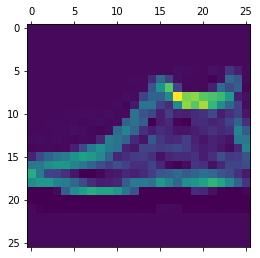

In [27]:
import matplotlib.pyplot as plt2
plt2.matshow(fexample[0, :, :, 1], cmap='viridis')

* So this is what the first feature has given us. At the outset it is looking as a shoe. 
* Now we will put everything together as follows

In [33]:
for x in range(4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)

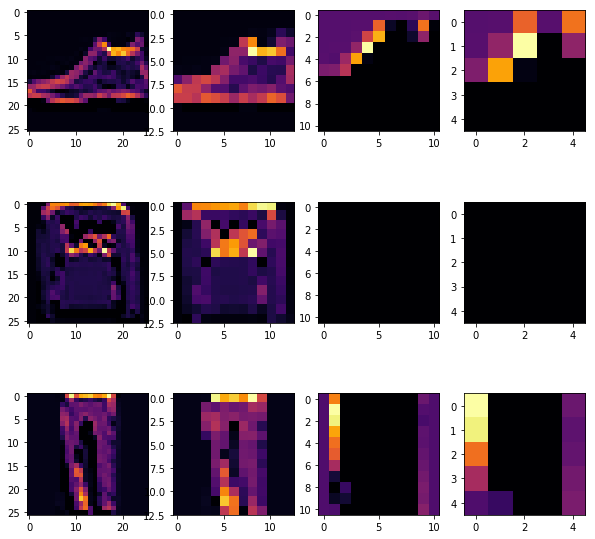

In [42]:
import matplotlib.pyplot as plt
# This will generate a plot with 7 subplots 3 in rows and 4 in columns
# The axes of each plot will be available in axarr list
f, axarr = plt.subplots(3, 4)
f.set_size_inches(10, 10)
FIRST_IMAGE = 0
SECOND_IMAGE = 1
THIRD_IMAGE = 2
FILTER_NUMBER = 1
from tensorflow.keras import models
# Creates a list of layer outputs for each layer in models module
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(4):
    # x = layer number
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)


### Interpreting the above plot

* So in the above plot across columns are **layers** and across rows are **different images**. col 1 = layer 1, col 2 = layer 2 and so on..
* So accross the first row we can see how the activations of **FILTER_NUMBER=1** proceeded for image 1 and for the second image we can refer to row 2.
* Now we see that in layer 3 and 4, we are getting very bad outputs for all 3 images. Why can this be? We have fitted 5 epochs and our loss is **0.19**. Can this be because we are overfitting? Lets look at what output we get when we train only 1 epochs

In [52]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 112s 60ms/step - loss: 0.4448


* Our loss after training 1 epoch is 0.4448

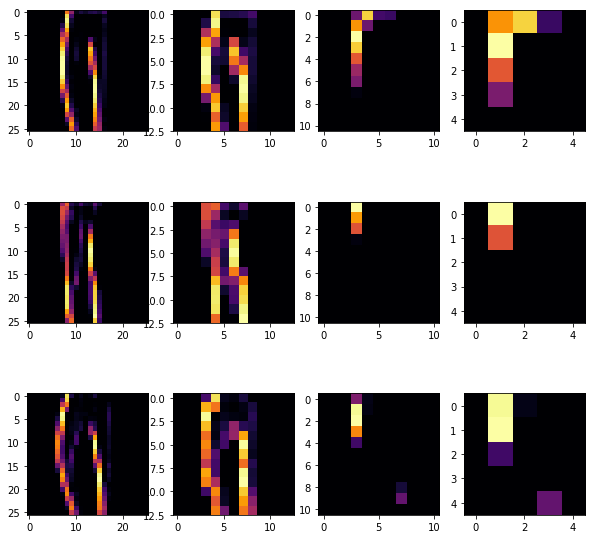

In [56]:
import matplotlib.pyplot as plt
# This will generate a plot with 7 subplots 3 in rows and 4 in columns
# The axes of each plot will be available in axarr list
f, axarr = plt.subplots(3, 4)
f.set_size_inches(10, 10)
FIRST_IMAGE = 2
SECOND_IMAGE = 3
THIRD_IMAGE = 5
FILTER_NUMBER = 26
from tensorflow.keras import models
# Creates a list of layer outputs for each layer in models module
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(4):
    # x = layer number
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, FILTER_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)

In [41]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

### Progress

* 8th video completed. Still need to play a bit more here to understand how the convolutions are working
* Completed auditing video 9. It again has experiments like above.
* In the above experiements the layers had a lot of filter 64.
* In the video 9 it is easier to experiment and understand as there is slightly less confusion.

### Video 9

In the following code we:
    1. Import a random image from scipy.misc.ascent()
    2. Define custom filter
    3. Convolute it over image and check the output
    4. The further on that output use maxpooling and check the output


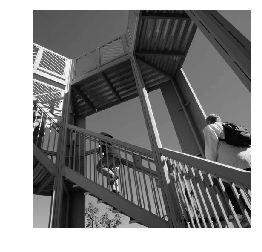

In [73]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

import matplotlib.pyplot as plt

%matplotlib inline
plt.grid(True)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [81]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
crop_copy = np.copy(i_transformed)


#filterr = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filterr = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filterr = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight = 1

### Try out what is the effect on a cropped version of the i_transformed image

* To run the convolution on cropped image run the following else run the next block without running this

In [82]:
i_crop = crop_copy[241:301, 271:331]
i_crop.shape
i_transformed = i_crop

* Plot of cropped image (optional)

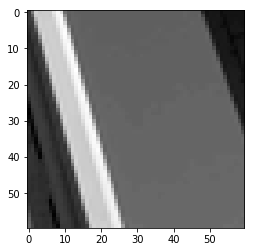

In [83]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

In [84]:
i_transformed.shape

(60, 60)

In [85]:
# Convolution operation
for x in range(1,i_transformed.shape[0]-1):
  for y in range(1,i_transformed.shape[1]-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filterr[0][0])
      convolution = convolution + (i[x, y-1] * filterr[0][1])
      convolution = convolution + (i[x + 1, y-1] * filterr[0][2])
      convolution = convolution + (i[x-1, y] * filterr[1][0])
      convolution = convolution + (i[x, y] * filterr[1][1])
      convolution = convolution + (i[x+1, y] * filterr[1][2])
      convolution = convolution + (i[x-1, y+1] * filterr[2][0])
      convolution = convolution + (i[x, y+1] * filterr[2][1])
      convolution = convolution + (i[x+1, y+1] * filterr[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

In [86]:
i_transformed.shape

(60, 60)

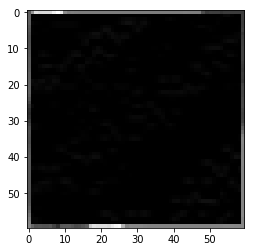

In [87]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()

### Why does above work and how?

* We chose filter

    [-1 -2 -1]
    
    [0  0  0]
    
    [1  2  1]
 
 * Let following be a 6 x 6 subset of pixels roughly resembling the middle pole in the image. The pole has sunlight on it and hence low intensity pixels on right and dark pixels on its left where sunlight is not there.
 
     [0 1 1 24 22 24]
     
     [2 1 2 26 21 26]
     
     [0 1 3 24 23 24]
     
* The output of the convolution operation will be
     [1 4 3 
     
     
### VERY IMPORTANT INTUITION

* 